In [23]:
!pip install yfinance

## 2015년도 경제 상황

1. 2015년 세계 경제 성장률은 약 **3.1%**로 추정되었음. 이는 2014년의 3.4%에서 소폭 둔화(주요 원인은 중국의 성장률 하락)
2. 미국의 금리 인상 2006년 이후로 처음으로 금리 인상. 0.25p -> -0.5p
  --> 미국 경제 회복 및 고용 증가 가능성
3. 국제 유가 급락. 100달러 -> 45달러

**주요 국가들의 경제 성장률**
- 미국: 2015년 미국 경제 성장률은 약 **3.1%**
- 중국: 중국 경제 성장률은 **6.9%**로, 지난 수십 년간의 고속 성장에 비해 둔화.


--> 경제 불확실성

**나의 의견**  
세계 경제 성장률 둔화를 통해 해당 국의 주식을 보유하고 있다면 비중을 낮추고 채권 비중을 높일 수 있을 것을 예상.

미국 금리 인상을 통해 미국 경제 기대감 높아짐. 미국의 기술주 비중을 높이면 좋을 것. 혹시 모르는 리스크를 헷지하기 위해 국체도 포트폴리오에 넣으면 좋을 것으로 보이며, 금리가 상상하는 초기에는 단기 국채 위주로 구성하면 좋을듯.

-->   

경제 성장을 기대하고 있으므로 아래와 같이 포트폴리오 구성

주식(기술주 중심의 미국 주식 ETF):70%
  - QQQ: 30%
  - SPY: 20%
  - 개별 주식(AAPL, MSFT, GOOGL, AMZN, NVDA)

채권(단기 중심): 20%
  - SHY: 10%
  - TLT: 5%
  - HYG: 5%

헷지용 대체 자산: 10%
  - GLD: 5%
  - USO: 5%

## 상관관계 분석

[*********************100%***********************]  14 of 14 completed


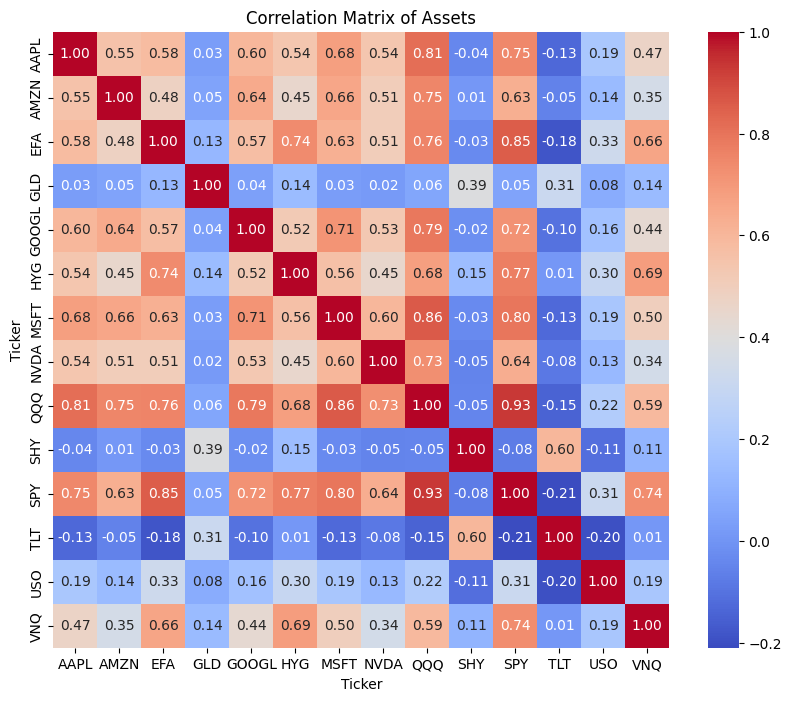

In [24]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 초기 설정
assets = ['QQQ', 'SPY', 'AAPL', 'MSFT', 'GOOGL', 'NVDA', 'AMZN', 'SHY', 'TLT', 'HYG', 'GLD', 'USO', 'EFA', 'VNQ']
start_date = "2015-01-01"
end_date = "2025-01-01"

# 데이터 다운로드
data = yf.download(assets, start=start_date, end=end_date)['Close']
data.dropna(inplace=True)

# 수익률 계산
daily_returns = data.pct_change().dropna()
average_returns = daily_returns.mean()
cov_matrix = daily_returns.cov()

# 상관계수 계산 및 시각화
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix of Assets')
plt.show()



In [21]:
negative_corr = correlation_matrix[correlation_matrix < 0]

negative_corr = negative_corr.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

negative_corr = negative_corr.stack().sort_values()

print("자산 쌍의 음의 상관관계:")
print(negative_corr)

자산 쌍의 음의 상관관계:
Ticker  Ticker
SPY     TLT      -0.210154
TLT     USO      -0.196283
EFA     TLT      -0.183039
QQQ     TLT      -0.146187
AAPL    TLT      -0.131607
MSFT    TLT      -0.128562
SHY     USO      -0.111817
GOOGL   TLT      -0.104168
NVDA    TLT      -0.082968
SHY     SPY      -0.076609
AMZN    TLT      -0.054524
NVDA    SHY      -0.053737
QQQ     SHY      -0.045977
AAPL    SHY      -0.042931
EFA     SHY      -0.032981
MSFT    SHY      -0.031697
GOOGL   SHY      -0.019439
dtype: float64


**인사이트**

1. 기술주의 성장은 TLT(미국 20년 국채 ETF)와 음의 상관관계를 보인다. 따라서 TLT와 SPY, QQQ, AAPL, MSFT등 주요 주식 및 기술 ETF와 상관관계가 있습니다. --> 주식 시장이 상승 할 때 채권 가격은 하락 --> TLT의 비중을 줄이고 기술주 포트폴리오에 비중을 높이면서 경기 침체를 대비해 주시하고 있을 필요가 있음.

2. 원자재(GLD, USO)와 채권도 음의 상관관계를 가짐. 금리 인상은 원재 가격에 부정적인 영향을 줄 수도 있음.



## 포트폴리오 구성

In [28]:
initial_investment = 1e8  # 1억 달러
portfolio = {
    'QQQ': 0.3,  # NASDAQ ETF: 30%
    'SPY': 0.2,  # S&P 500 ETF: 20%
    'AAPL': 0.04,  # Apple: 4%
    'MSFT': 0.04,  # Microsoft: 4%
    'GOOGL': 0.04,  # Google: 4%
    'NVDA': 0.04,  # NVIDIA: 4%
    'AMZN': 0.04,  # Amazon: 4%
    'SHY': 0.1,   # Treasury Bond ETF: 10%
    'TLT': 0.05,   # Treasury Bond ETF: 5%
    'HYG': 0.05,   # High Yield Bond ETF: 5%
    'GLD': 0.1,  # Gold ETF: 10%
    'USO': 0.1,  # Oil ETF: 10%
}

start_date = "2015-01-01"
end_date = "2025-01-01"

data = yf.download(list(portfolio.keys()), start=start_date, end=end_date)['Close']

[*********************100%***********************]  12 of 12 completed


금융상품별 분석 결과:
QQQ: 최대 낙폭 (MDD): -35.12%, 총 수익률: 436.64%
SPY: 최대 낙폭 (MDD): -33.72%, 총 수익률: 239.57%
AAPL: 최대 낙폭 (MDD): -38.52%, 총 수익률: 928.54%
MSFT: 최대 낙폭 (MDD): -37.15%, 총 수익률: 949.75%
GOOGL: 최대 낙폭 (MDD): -44.32%, 총 수익률: 617.54%
NVDA: 최대 낙폭 (MDD): -66.34%, 총 수익률: 27695.05%
AMZN: 최대 낙폭 (MDD): -56.15%, 총 수익률: 1322.21%
SHY: 최대 낙폭 (MDD): -5.71%, 총 수익률: 13.22%
TLT: 최대 낙폭 (MDD): -48.35%, 총 수익률: -11.77%
HYG: 최대 낙폭 (MDD): -22.03%, 총 수익률: 49.12%
GLD: 최대 낙폭 (MDD): -22.00%, 총 수익률: 112.25%
USO: 최대 낙폭 (MDD): -89.77%, 총 수익률: -52.52%

포트폴리오 전체 성과:
최대 낙폭 (MDD): -31.19%
총 수익률: 676.10%


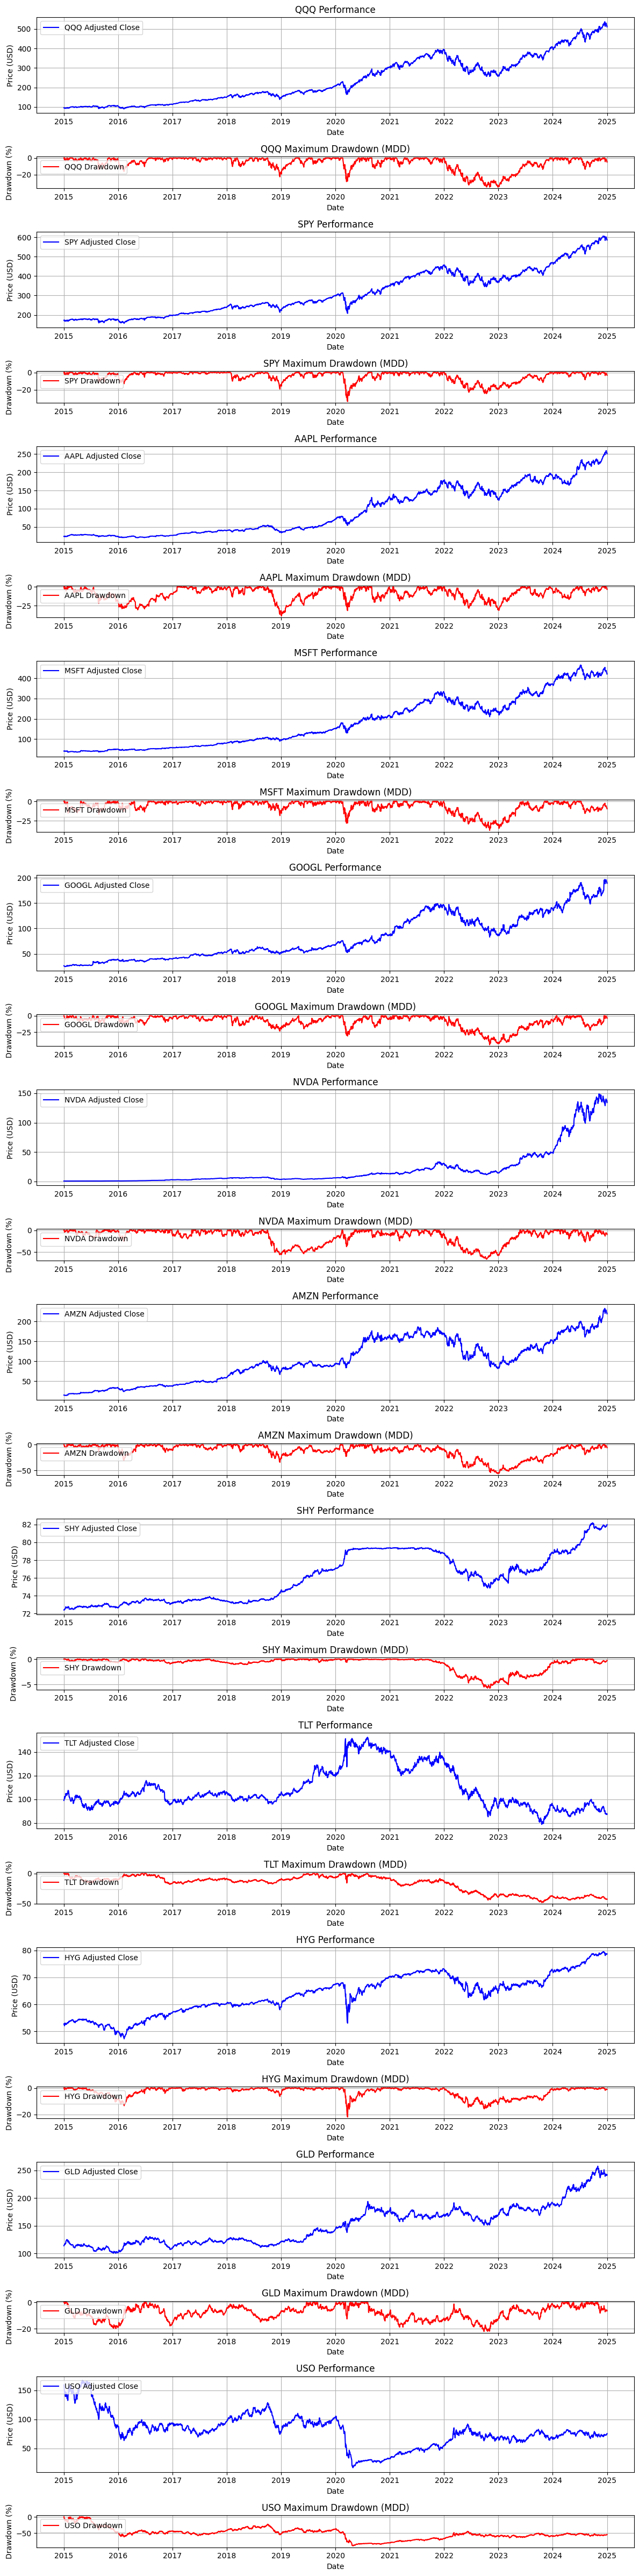

In [29]:
# MDD 및 총 수익률 계산 함수
def calculate_metrics(prices):
    normalized = prices / prices.iloc[0]
    cumulative_max = np.maximum.accumulate(normalized)
    drawdown = (normalized - cumulative_max) / cumulative_max
    max_drawdown = drawdown.min()
    total_return = (normalized.iloc[-1] - 1) * 100
    return max_drawdown * 100, total_return, drawdown

# 포트폴리오 성과 계산 함수
def calculate_portfolio_performance(data, portfolio):
    weighted_returns = np.sum(data.pct_change().fillna(0) * list(portfolio.values()), axis=1)
    portfolio_cumulative = (1 + weighted_returns).cumprod()
    return portfolio_cumulative

# 분석 결과 저장 및 출력
results = {}
drawdown_data = {}
portfolio_performance = calculate_portfolio_performance(data, portfolio)

for asset in portfolio:
    mdd, total_return, drawdown = calculate_metrics(data[asset])
    results[asset] = {"MDD": mdd, "Total Return": total_return}
    drawdown_data[asset] = drawdown

# 포트폴리오 성과 계산
portfolio_mdd, portfolio_total_return, portfolio_drawdown = calculate_metrics(portfolio_performance)

# 분석 결과 출력
print("금융상품별 분석 결과:")
for asset, metrics in results.items():
    print(f"{asset}: 최대 낙폭 (MDD): {metrics['MDD']:.2f}%, 총 수익률: {metrics['Total Return']:.2f}%")

# 포트폴리오 분석 결과 출력
print(f"\n포트폴리오 전체 성과:")
print(f"최대 낙폭 (MDD): {portfolio_mdd:.2f}%")
print(f"총 수익률: {portfolio_total_return:.2f}%")

# 시각화
fig, axes = plt.subplots(len(portfolio) * 2, 1, figsize=(12, 4 * len(portfolio)),
                         gridspec_kw={'height_ratios': [3, 1] * len(portfolio)})

axes = axes.flatten()

for i, asset in enumerate(portfolio.keys()):
    main_ax = axes[i * 2]  # 성과 차트
    sub_ax = axes[i * 2 + 1]  # MDD 차트

    # 성과 차트
    main_ax.plot(data[asset], label=f"{asset} Adjusted Close", color='blue')
    main_ax.set_title(f"{asset} Performance")
    main_ax.set_xlabel("Date")
    main_ax.set_ylabel("Price (USD)")
    main_ax.legend(loc='upper left')
    main_ax.grid()

    # MDD 차트
    sub_ax.plot(drawdown_data[asset] * 100, label=f"{asset} Drawdown", color='red')
    sub_ax.set_title(f"{asset} Maximum Drawdown (MDD)")
    sub_ax.set_xlabel("Date")
    sub_ax.set_ylabel("Drawdown (%)")
    sub_ax.legend(loc='upper left')
    sub_ax.grid()

plt.tight_layout()
plt.show()
